# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры, влияющие на рыночную цену объекта недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:
1. Установить параметры влияющие на рыночную цену объекта недвижимости.
2. Определить какие параметры влияют большего всего на рыночную цену объекта. 
3. Найти топ-10 населеных пунктов с наибольшим кол-вом объявлений и посмотреть на среденюю цену одного метра в данных населеных пунктах.

**Ход исследования**

Данные о поведении пользователей хранятся в файле `real_estate_data.csv.`. О качестве данных ничего не известно. Поэтому перед началом исследователькой работы понадобится обзор данных. 
При обзоре данных могут выявится пропуски и неявные дубликаты, которые необходимо обработать и устранить. 
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследование параметров, определяющих рыночную цену объекта недвижимости.

### 1. Изучение общей информации

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('real_estate_data.csv',sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

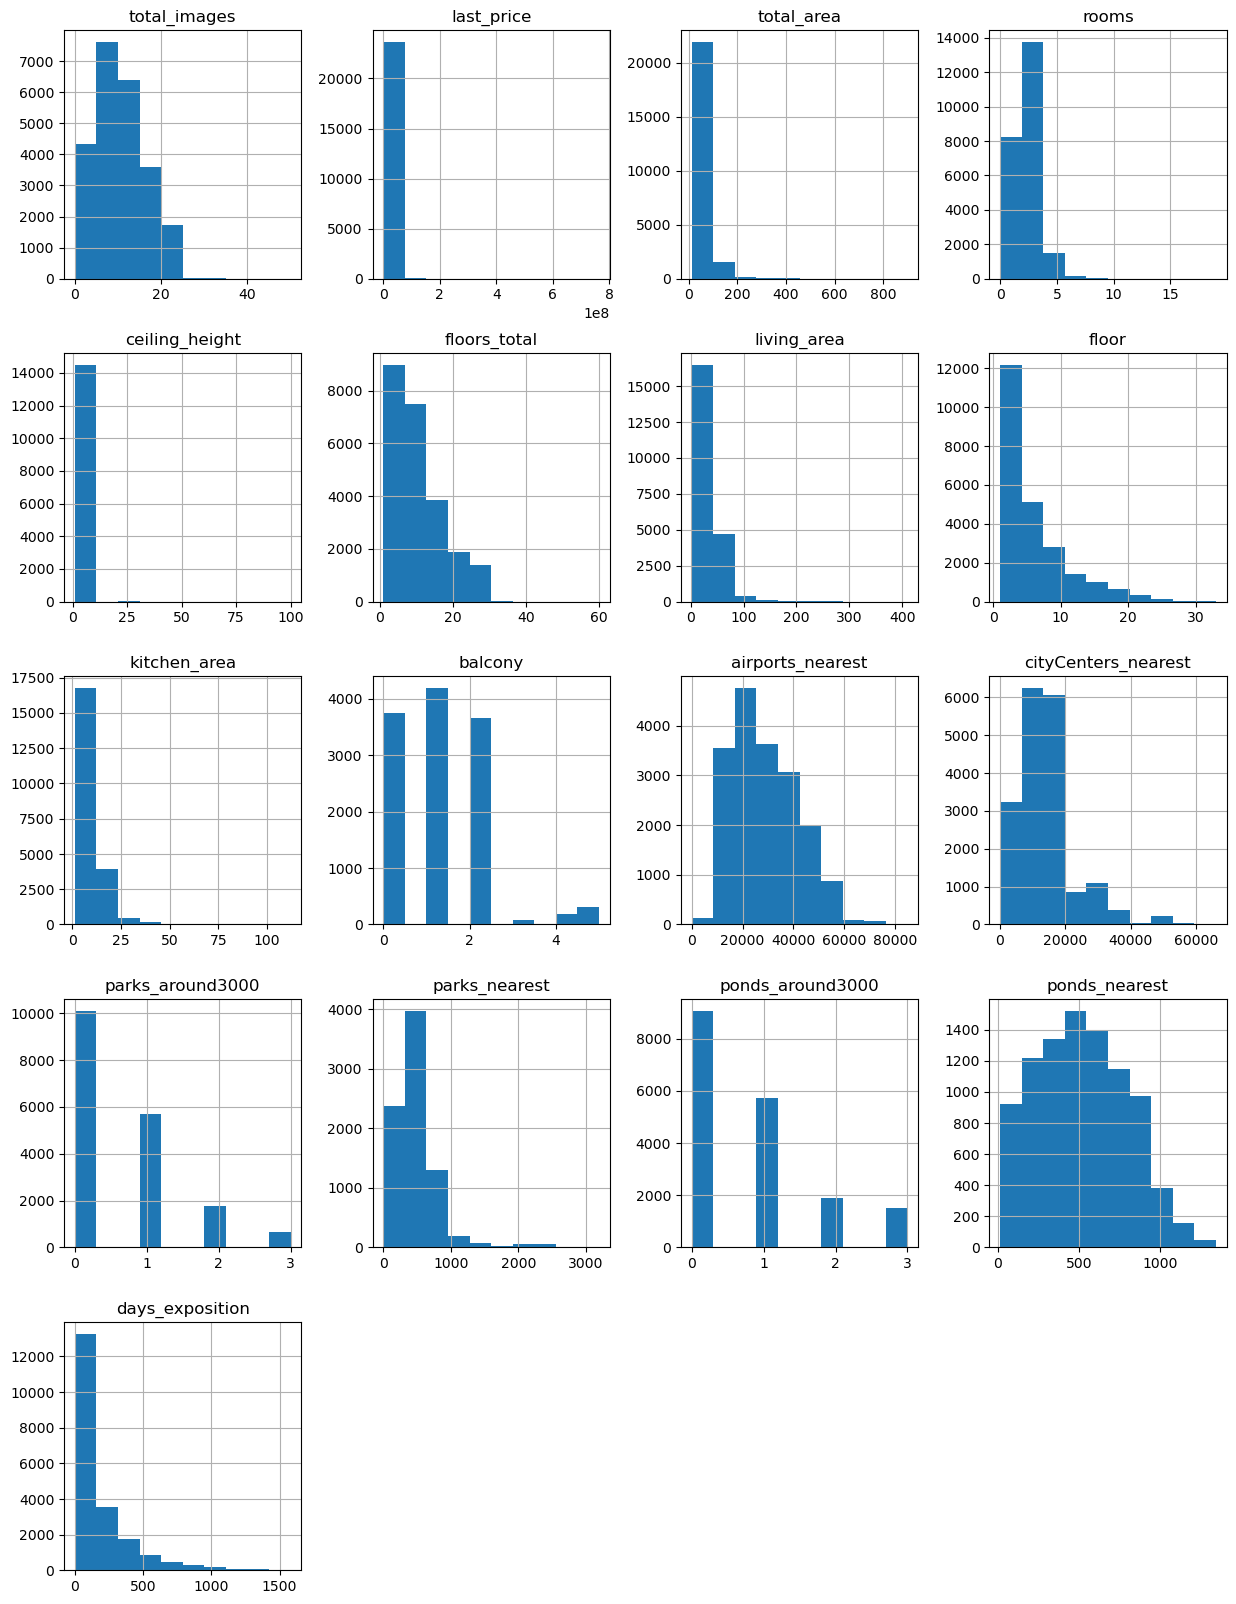

In [4]:
#распределение значений по столбцам
data.hist(figsize=(15, 20));

**Промежуточный вывод**

Из общей информации видно, что в данных присутствует большее кол-во пропусков.

### 2. Предобработка данных

#### 2.1. Пропуски.  Найдем и изучим пропущенные значения в столбцах.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#найдем долю пропусков в данных
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') 

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Доля пропусков распределена не равномерно, где-то они составляю почти 90% от всех данных. Рассмотрим причины таких пропусков. 
`ceiling_height` - скорее всего связаны с тем, что человек,выставляющий объявления не указал высоту потолков в квартире. Также сюда можно отнести случайные пропуски.

`floors_total` - скорее всего пропуски случайна, их доля составляет меньше одного процента. 

`living_area` - пропуски также могут быть случайны, так как они составляют меньше 10%. 

`is_apartment` - так как этот столбец представляет собой булевый тип данных, скорее всего продавцы квартир не заполняли данную колонку, если их недвижимость не являетс апартаментами. 

`kitchen_area` -  пропуски также могут быть случайны, так как они составляют меньше 10%. 

`locality_name`- случайные, меньше 1%

`balcony` - возможно данные пропущены, в тех объявлениях, где балкона нет. 

`airports_neares`,`cityCenters_nearest`,`parks_nearest`,`ponds_nearest` - продавец мог не знать сколько км до ближайшего аэропорта/парка/пруда, либо же до ближайшего аэропорта/парка/пруда крайне большое расстояние, либо его совсем нет. 

`parks_around3000`,`ponds_around3000` - продавец мог не знать сколько кол-во парков, расположены в пределах 3000 м

`days_exposition` - скорее всего пропуски случайна


В столбцах, где доля пропусков составляет меньше 1%, можно удалить соответствующие строки. 

In [7]:
data['balcony'] = data['balcony'].fillna(0)

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [10]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [11]:
data['living_area'] = (
    data['living_area']
    .fillna((data['living_area']/data['total_area']).mean()*data['total_area'])
)    

In [12]:
data['kitchen_area'] = (
    data['kitchen_area']
    .fillna((data['kitchen_area']/data['total_area']).mean()*data['total_area'])
) 

In [13]:
data = data.dropna(subset=['floors_total','locality_name']).reset_index(drop=True)

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [15]:
# заполним медианой столбцы ceiling_height и airports_nearest, относительного своего населенного пункта
name_columns = ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for column in name_columns:
    data[column] = data[column].fillna(data.groupby('locality_name')[column].transform(lambda x: x.median()))


In [16]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           120
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

In [17]:
#заполним оставшиеся пропуски общей медианой по Лен. области (120 пропусков)
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

In [18]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5432
cityCenters_nearest     5432
parks_around3000           0
parks_nearest           5986
ponds_around3000           0
ponds_nearest           5517
days_exposition         3171
dtype: int64

#### 2.2. Изменение типа данных

In [19]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data.query('floors_total.isna() == False')['floors_total'].astype('int')
data['balcony'] = data.query('balcony.isna() == False')['balcony'].astype('int')
data['parks_around3000'] = data.query('parks_around3000.isna() == False')['parks_around3000'].astype('int')
data['ponds_around3000'] = data.query('ponds_around3000.isna() == False')['ponds_around3000'].astype('int')
data['days_exposition'] = data.query('days_exposition.isna() == False')['days_exposition'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

В столбцах `last_price`,`floors_total`,`balcony`,`parks_around3000`,`ponds_around3000`,`days_exposition` могут быть только целые значения, поэтому их необходимо изменить на тип данных "int".
Столбец `first_day_exposition` необходимо изменить на специальный формат данных (даты).  

#### 2.3. Поиск и удаление дубликатов

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
#приведем значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [22]:
#заменим ё на е
data['locality_name'] = data['locality_name'].str.replace('ё','е') 

In [23]:
data['locality_name'].nunique()

330

In [24]:
for row in range(len(data)):
    data.loc[row,'locality_name'] = data.loc[row,'locality_name']\
    .replace(data.loc[row,'locality_name'], (data.loc[row,'locality_name'].split()[-1]))                                                                          

In [25]:
data['locality_name'].nunique()

294

In [26]:
#проверим на наличие дубликатов
data.duplicated().sum() 

0

**Промежуточный вывод:** В данном разделе были найдены и устранены неявные дубликаты. Кол-во уникальных значение в столбце `locality_name` сократилось до 294.

#### 2.4. Нахождение и удаление выбросов

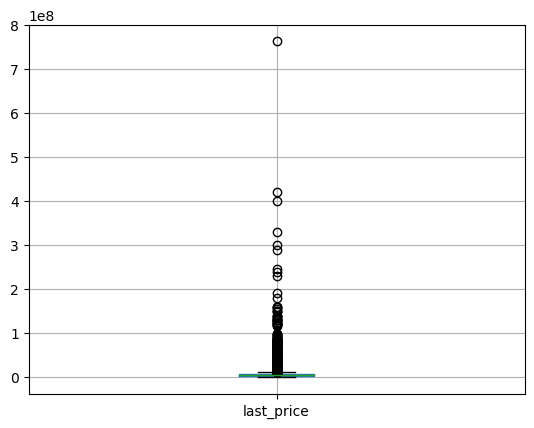

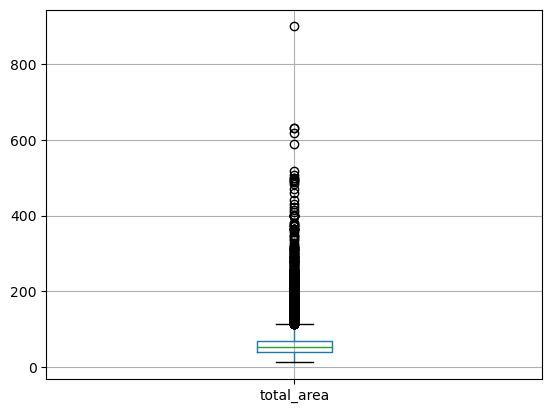

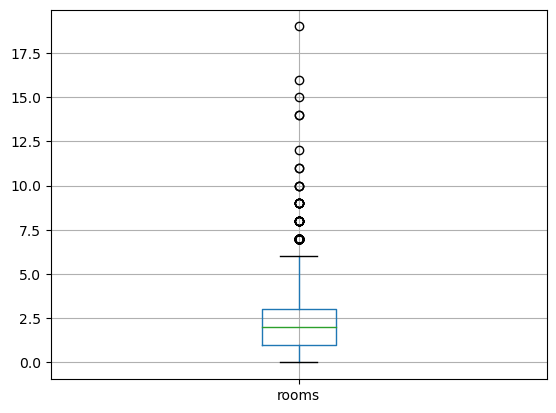

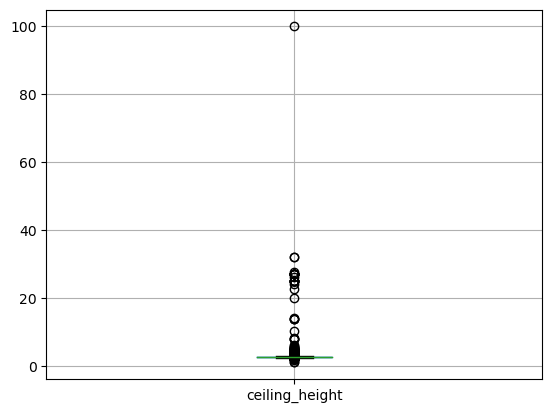

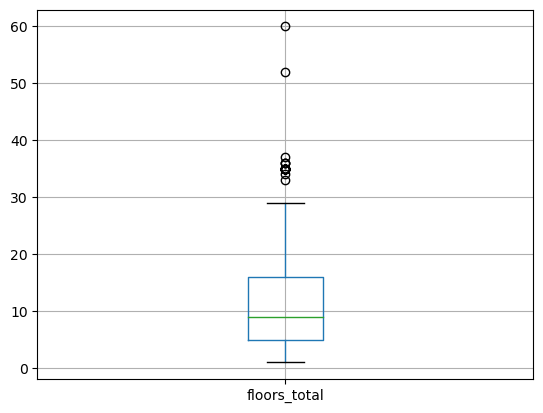

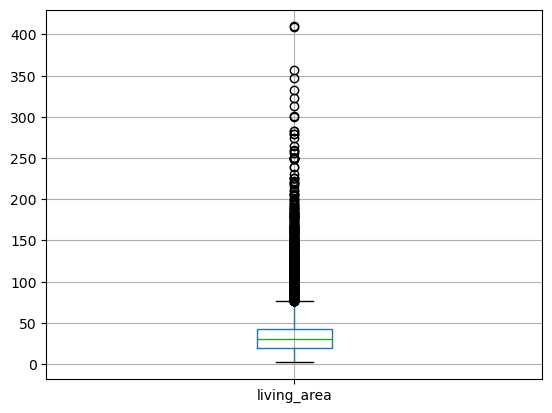

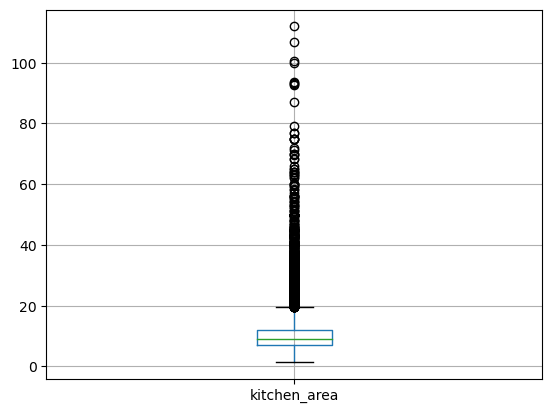

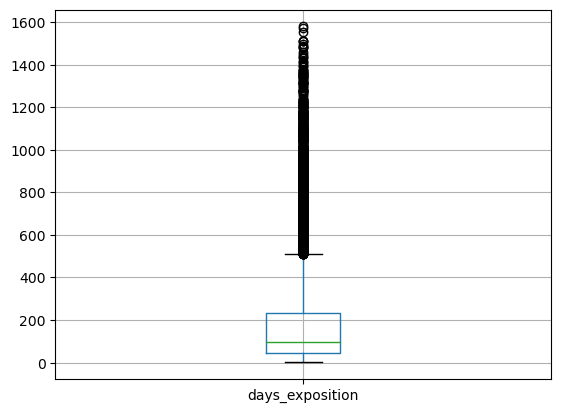

In [27]:
data.boxplot('last_price')
plt.show()
data.boxplot('total_area')
plt.show()
data.boxplot('rooms')
plt.show()
data.boxplot('ceiling_height')
plt.show()
data.boxplot('floors_total')
plt.show()
data.boxplot('living_area')
plt.show()
data.boxplot('kitchen_area')
plt.show()
data.boxplot('days_exposition')
plt.show()

Из диаграмм размаха мы можем увидеть, что в столбцах `ceiling_height` и `floors_total` несколько значений сильно выбиваются от других. Посмотрим на их уникальные значения. 

In [28]:
data['ceiling_height'].unique()

array([  2.7  ,   2.615,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,   3.25 ,   3.45 ,   2.77 ,
         2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,  13.85 ,
         2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,
         3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,
         2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,   2.79 ,
         2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,   2.83 ,
         4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.18 ,
         3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,   2.82 ,
         2.65 ,   3.98 ,   2.63 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,
         3.75 ,   2.

In [29]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [30]:
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = data['ceiling_height']/10 
data = data.loc[data['floors_total'] < 40] 
#восстановим корректное значение в столбце ceiling_height и floors_total

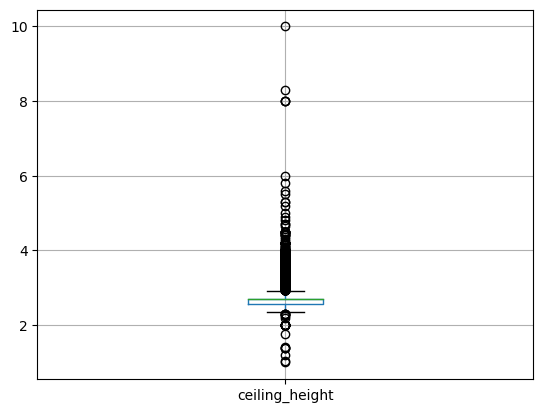

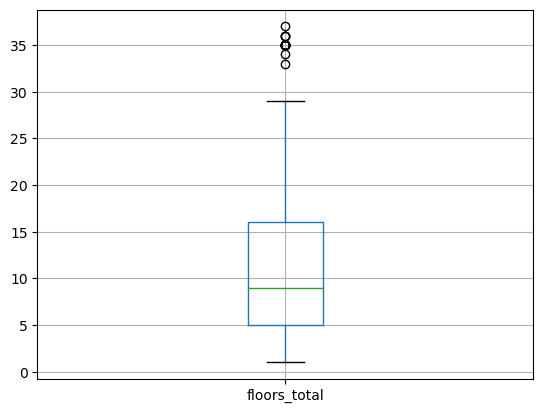

In [31]:
data.boxplot('ceiling_height')
plt.show()
data.boxplot('floors_total')
plt.show()

Из диаграммы размах, построенной по измененным данным, видно, что в стоблце `ceiling_height` осталичь аномальные значения, сильно выделяющие от других. В столбце `floors_total` тоже остались выбросы, однако это связано с разноэтажностью зданий в разных населенных пунктах. 

In [32]:
def finding_moustache(column):
    
    '''функция которая принимает на вход столбец датафрейма и возвращает
    список состащий из правого и левого усика диаграммы размаха.
    Функция помогает найти и убрать выбросы в данных'''
    
    data_describe = data[column].describe()
    #межквартильный размах 
    iqr = data_describe[6] - data_describe[4]
    #граница левого и правого уса
    left_moustache = round(data_describe[6] - 1.5*iqr, 2)
    right_moustache = round(data_describe[4] + 1.5*iqr, 2)
    # левый ус должен быть меньше минимального значения
    if left_moustache < data_describe[3]:
        left_moustache = data_describe[3]
    # правый ус должен быть больше максимального значения
    if right_moustache > data_describe[7]:
        right_moustache = data_describe[7]
    return [left_moustache, right_moustache]
    # Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».

In [33]:
data = data.query('(@finding_moustache("last_price")[0] <= last_price and last_price <= @finding_moustache("last_price")[1]) and \
                  (@finding_moustache("total_area")[0] <= total_area and total_area <= @finding_moustache("total_area")[1]) and \
                  (@finding_moustache("rooms")[0] < rooms and rooms <= @finding_moustache("rooms")[1]) and \
                  (@finding_moustache("ceiling_height")[0] <= ceiling_height and ceiling_height <= @finding_moustache("ceiling_height")[1]) and \
                  (@finding_moustache("living_area")[0] <= living_area and living_area <= @finding_moustache("living_area")[1]) and \
                  (@finding_moustache("kitchen_area")[0] <= kitchen_area and kitchen_area <= @finding_moustache("kitchen_area")[1]) and \
                  (@finding_moustache("days_exposition")[0] <= days_exposition and days_exposition <= @finding_moustache("days_exposition")[1])'
                 )

In [34]:
data = data.reset_index(drop=True)

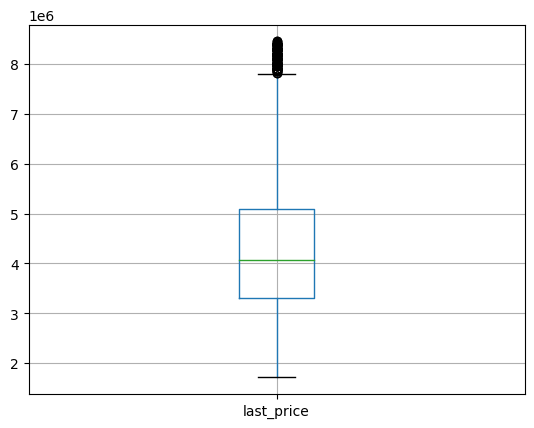

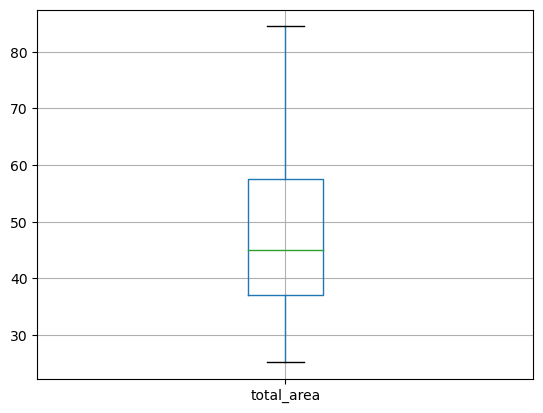

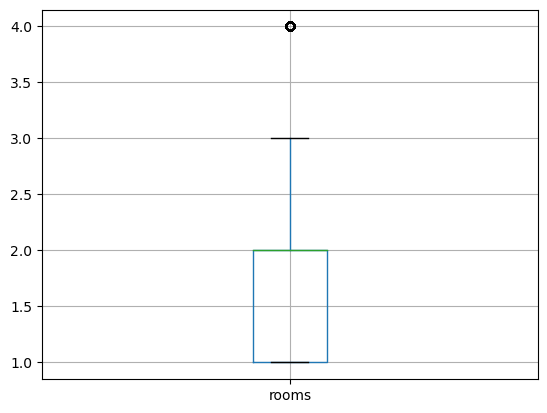

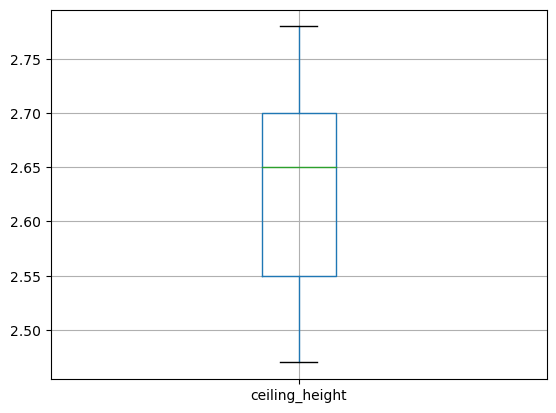

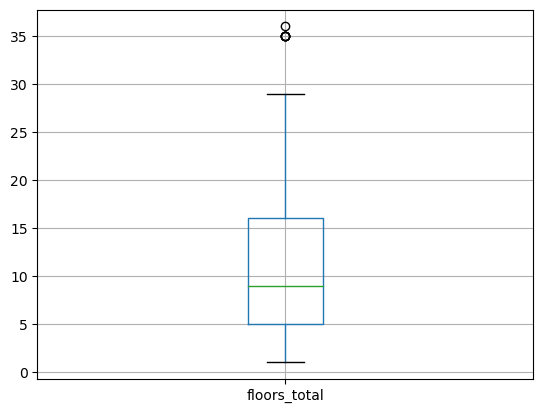

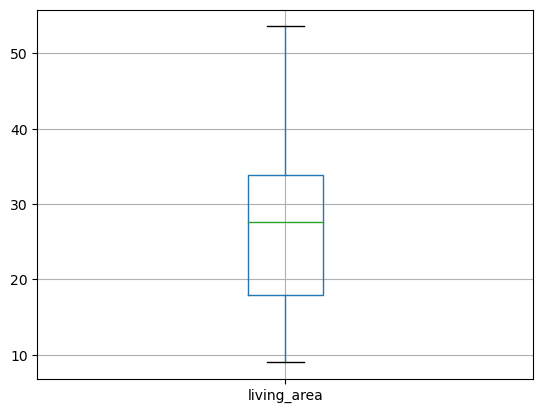

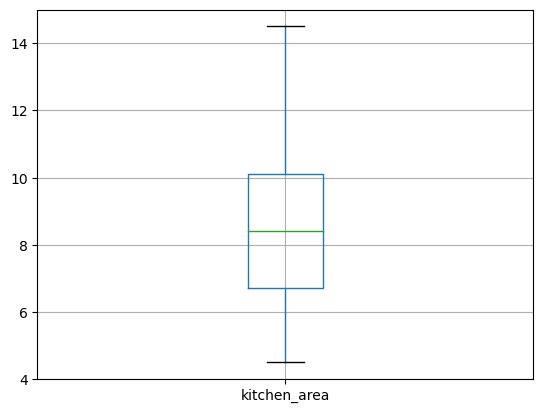

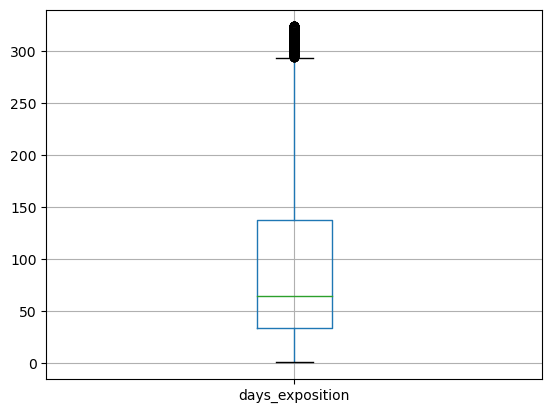

In [35]:
data.boxplot('last_price')
plt.show()
data.boxplot('total_area')
plt.show()
data.boxplot('rooms')
plt.show()
data.boxplot('ceiling_height')
plt.show()
data.boxplot('floors_total')
plt.show()
data.boxplot('living_area')
plt.show()
data.boxplot('kitchen_area')
plt.show()
data.boxplot('days_exposition')
plt.show()

**Промежуточный вывод:** В столбцах `ceiling_height` и `floors_total` были обнаружены аномальные значение, скорее всего связанные с человеческим фактором. 
Во всех остальных столбцах были удалена выбросы с помощью функции `finding_moustache`.

### 3. Добавим в таблицу новые столбцы, необходимые для дальнейшего анализа

In [36]:
data['price_one_metre'] = (data['last_price']/data['total_area']).astype('int')
#цена одного квадратного метра


In [37]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#день недели публикации объявления

In [38]:
#месяц публикации объявления
data['first_day_exposition'].dt.date #приводим к временному формату
data['month_exposition'] = data['first_day_exposition'].astype('datetime64[M]') 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,weekday_exposition,month_exposition
0,7,3350000,40.40,2018-12-04,1,2.615,11,18.60,1,False,...,12817.0,18603.0,0,NaN,0,584.5,81.0,82920,1,2018-12-01
1,10,2890000,30.40,2018-09-10,1,2.600,12,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,2018-09-01
2,6,3700000,37.30,2017-11-02,1,2.640,26,10.60,6,False,...,52996.0,19143.0,0,733.0,0,593.0,155.0,99195,3,2017-11-01
3,20,2900000,33.16,2018-05-23,1,2.700,27,15.43,26,False,...,NaN,NaN,0,NaN,0,NaN,189.0,87454,2,2018-05-01
4,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,False,...,50898.0,15008.0,0,460.0,0,504.0,289.0,88524,6,2017-02-01
5,5,5050000,39.60,2017-11-16,1,2.670,12,20.30,3,False,...,38357.0,13878.0,1,310.0,2,553.0,137.0,127525,3,2017-11-01
6,9,3300000,44.00,2018-08-27,2,2.550,5,31.00,4,False,...,48252.0,51677.0,0,407.0,0,553.0,7.0,75000,0,2018-08-01
7,10,3890000,54.00,2016-06-30,2,2.600,5,30.00,5,False,...,NaN,NaN,0,NaN,0,NaN,90.0,72037,3,2016-06-01
8,1,4400000,36.00,2016-06-23,1,2.600,6,17.00,1,False,...,20782.0,30759.0,0,399.5,1,96.0,203.0,122222,3,2016-06-01
9,16,4650000,39.00,2017-11-18,1,2.700,14,20.50,5,False,...,12900.0,14259.0,1,590.0,1,296.0,19.0,119230,5,2017-11-01


In [39]:
#год публикации объявления
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [40]:
#тип этажа квартиры
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floors_total'] == row['floor']:
        return 'последний'
    return 'другой'

In [41]:
data['type_floor'] = data.apply(floors,axis=1)

In [42]:
#расстояние до центра города в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000)
data['cityCenters_nearest_km'] = data.query('cityCenters_nearest_km.isna() == False')['cityCenters_nearest_km'].astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,7,3350000,40.40,2018-12-04,1,2.615,11,18.60,1,False,...,NaN,0,584.5,81.0,82920,1,2018-12-01,2018,первый,18.0
1,10,2890000,30.40,2018-09-10,1,2.600,12,14.40,5,False,...,NaN,0,NaN,55.0,95065,0,2018-09-01,2018,другой,NaN
2,6,3700000,37.30,2017-11-02,1,2.640,26,10.60,6,False,...,733.0,0,593.0,155.0,99195,3,2017-11-01,2017,другой,19.0
3,20,2900000,33.16,2018-05-23,1,2.700,27,15.43,26,False,...,NaN,0,NaN,189.0,87454,2,2018-05-01,2018,другой,NaN
4,18,5400000,61.00,2017-02-26,3,2.500,9,43.60,7,False,...,460.0,0,504.0,289.0,88524,6,2017-02-01,2017,другой,15.0
5,5,5050000,39.60,2017-11-16,1,2.670,12,20.30,3,False,...,310.0,2,553.0,137.0,127525,3,2017-11-01,2017,другой,13.0
6,9,3300000,44.00,2018-08-27,2,2.550,5,31.00,4,False,...,407.0,0,553.0,7.0,75000,0,2018-08-01,2018,другой,51.0
7,10,3890000,54.00,2016-06-30,2,2.600,5,30.00,5,False,...,NaN,0,NaN,90.0,72037,3,2016-06-01,2016,последний,NaN
8,1,4400000,36.00,2016-06-23,1,2.600,6,17.00,1,False,...,399.5,1,96.0,203.0,122222,3,2016-06-01,2016,первый,30.0
9,16,4650000,39.00,2017-11-18,1,2.700,14,20.50,5,False,...,590.0,1,296.0,19.0,119230,5,2017-11-01,2017,другой,14.0


В данном разделе были добавлены новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### 4. Исследовательский анализ данных

#### 4.1. Изучим основные параментры объекта

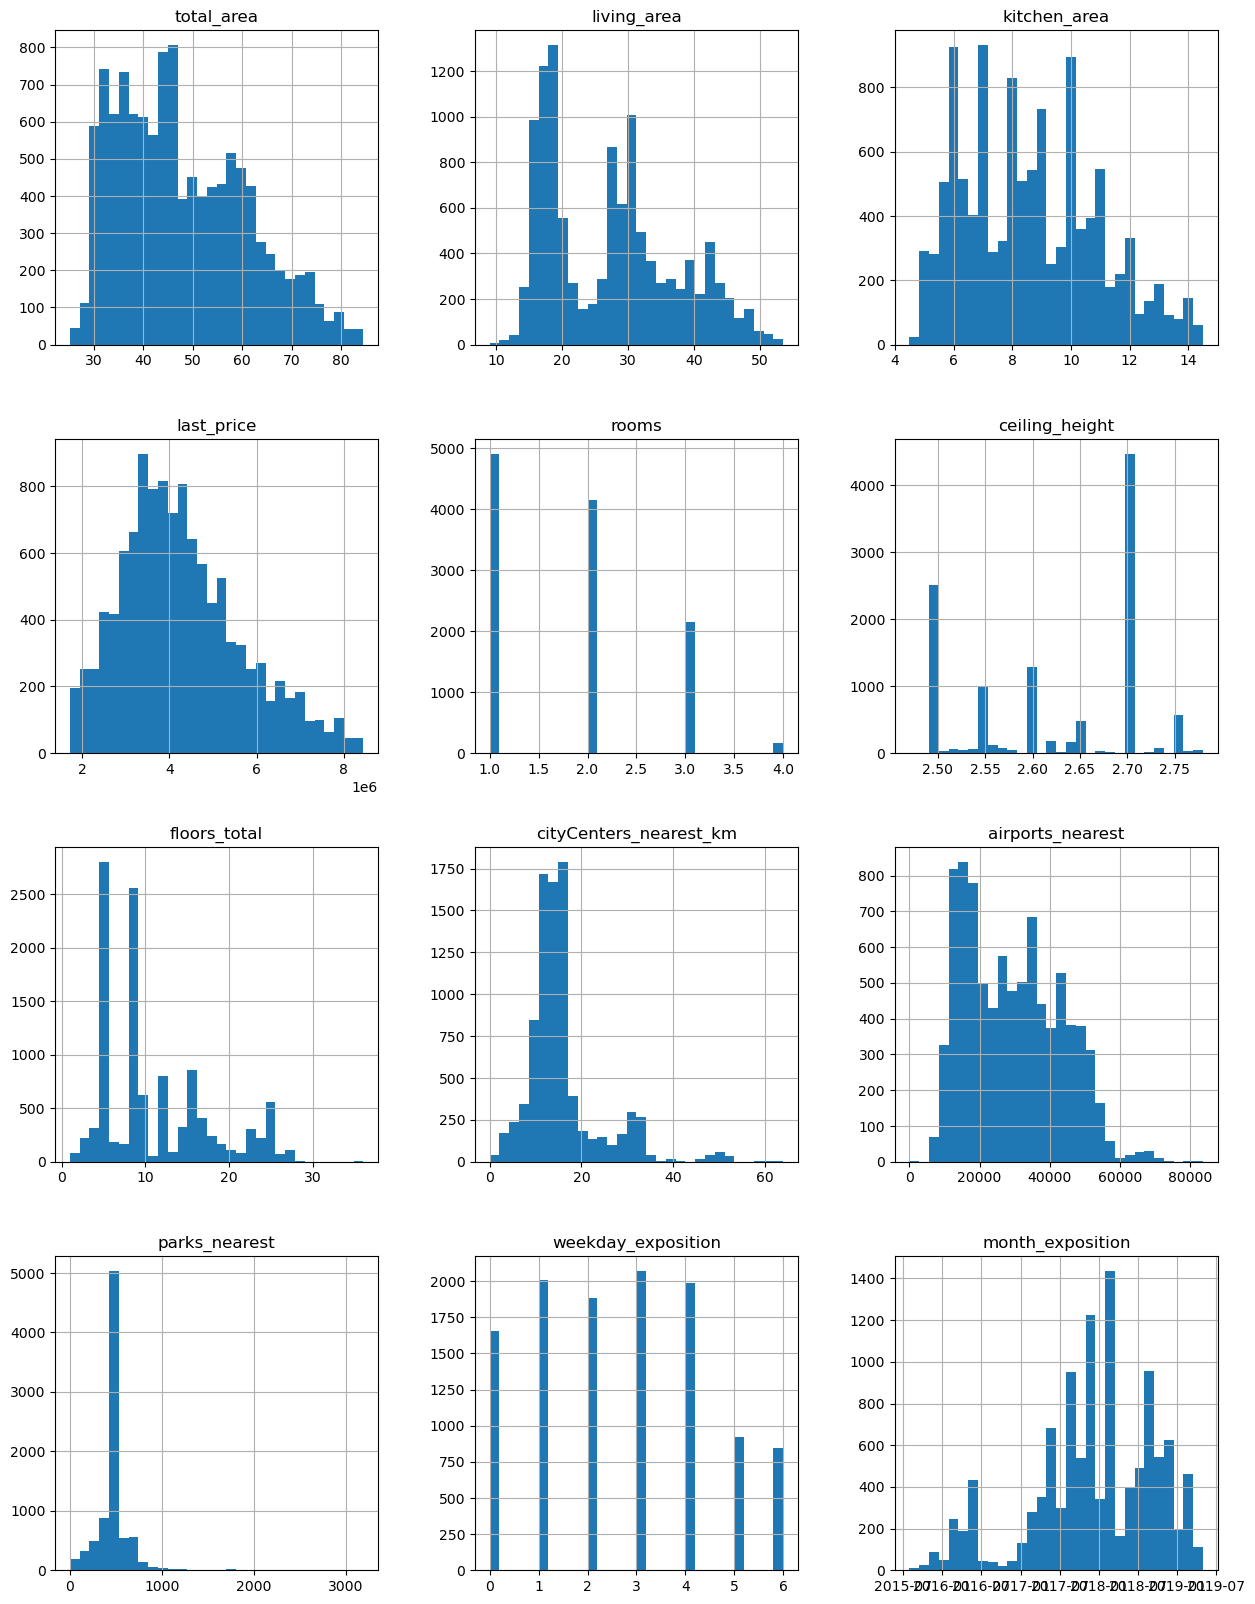

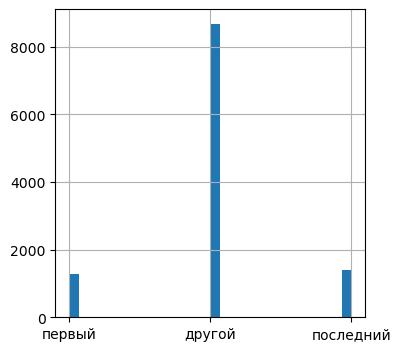

In [43]:
list = [['total_area','living_area','kitchen_area', 'last_price', \
         'rooms','ceiling_height', 'type_floor', 'floors_total', 'cityCenters_nearest_km', \
        'airports_nearest', 'parks_nearest', 'weekday_exposition', 'month_exposition']]

for column in list:
    data[column].hist(figsize=(15,20), bins=30)
    
plt.show()
data['type_floor'].hist(bins=30, figsize=(4,4));
    

**Промежуточный вывод**

Из диаграммы `total_area` видно, что основная доля объявлений приходится на площадь квартиры равно 30-48 кв.м. Особенно на площадь равную 45 кв.м.

Из диаграммы `living_area` видны наиболее частовстречающиеся размеры жилой площади квартиры: 15 и 30 кв. м.

Диаграма `kitchen_area` крайне неоднородна. Пики приходятся на целые значения: 6,7, 8 и 10 кв.м.

Из диаграммы `last_price` видно нормальное распределение данных. Наиболее частовстречающая цена 4 000 000 руб.

Из диаграммы `rooms` видно, что больше всего объявлений однокомнатных квартир. С ростом числа комнат снижается число объявлений. 

Диаграма `ceiling_height`. Пики приходятся на целые значения: 2.5, 2.6 и 2.7 метров. С ростом высоты потолков кол-во объявлений снижается. 

Диаграма `floors_total` неоднородна. В основном квартиры расположены в 5 и 9 -этажных домах. 

Диаграма `type_floor` показывает, что больше всего объявлений квартир расположенных на других этажах (за исключением первого и последнего) 

Из диаграммы `cityCenters_nearest_km` видно, что больше всего объявлений квартир, расположеных в пределах 18 км от центра населеного пункта. 

Диаграмма `airports_nearest` показывает, что больше всего объявлений квартир, расположеных в пределах 20 км от аэропорта. С Ростом удаленности квартиры от аропорта снижается число объявлений. 

Диаграммы `parks_nearest` показывает, что в большей доле квартир парк расположен в пределах 500 - 1000 м. 

Из диаграммы `weekday_exposition` видно, что больше всего объявлений было опубликовано в будние дни.

Из диаграммы `month_exposition` видно, что больше всего объявлений было опубликовано в зимой и осенью.

#### 4.2. Изучим как быстро продавались квартиры

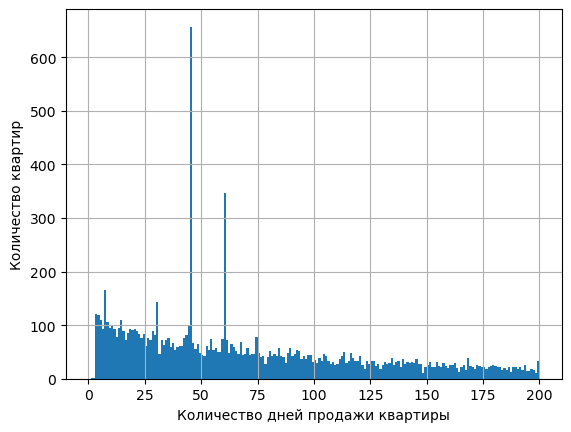

In [44]:
data['days_exposition'].hist(bins=200, range=(0,200))
plt.xlabel("Количество дней продажи квартиры")
plt.ylabel("Количество квартир");

In [45]:
data['days_exposition'].describe()

count    11374.000000
mean        93.632583
std         79.020562
min          1.000000
25%         34.000000
50%         65.000000
75%        138.000000
max        324.000000
Name: days_exposition, dtype: float64

In [46]:
data[data['days_exposition'] == 45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
42,9,4350000,37.0,2018-02-22,1,2.70,19,18.000000,6,False,...,460.0,0,504.0,45.0,117567,3,2018-02-01,2018,другой,14.0
45,9,2500000,63.0,2018-10-25,3,2.50,5,43.000000,4,False,...,NaN,0,NaN,45.0,39682,3,2018-10-01,2018,другой,NaN
71,12,4350000,55.0,2017-05-21,2,2.57,9,31.200000,2,False,...,589.0,0,474.0,45.0,79090,6,2017-05-01,2017,другой,34.0
72,15,3100000,47.3,2017-11-07,2,2.60,5,27.500000,2,False,...,NaN,0,NaN,45.0,65539,1,2017-11-01,2017,другой,NaN
76,0,2300000,60.0,2017-12-02,2,2.50,3,33.885931,1,False,...,NaN,0,NaN,45.0,38333,5,2017-12-01,2017,первый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11299,9,3600000,45.0,2017-06-14,2,2.50,5,28.700000,3,False,...,460.0,1,658.0,45.0,80000,2,2017-06-01,2017,другой,11.0
11328,10,2900000,43.4,2018-01-11,2,2.70,5,24.510824,1,False,...,202.0,2,397.0,45.0,66820,3,2018-01-01,2018,первый,14.0
11335,4,3950000,52.0,2018-03-04,3,2.64,5,29.367807,2,False,...,733.0,0,593.0,45.0,75961,6,2018-03-01,2018,другой,21.0
11366,0,2500000,35.0,2017-12-08,1,2.50,9,19.766793,4,False,...,NaN,0,NaN,45.0,71428,4,2017-12-01,2017,другой,NaN


Из диаграмы виден низходящий тренд. В основном квартиры продавались в первые 60 дней. Пики приходятся на 45 и 60 дней. Продажа в течение 45 и 60 дней сильно выделяется среди остальных данных. При проверке объявлений, в которых время продажи объекта составило 45 дней, не обнаружено ничего странного, однако удивительно что продажа 657 объектов приходится именно на 45 дней,  вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил. 

Медиана равна 65 дням, а среднее 94 дням. Как можно заметить есть крайне быстрые продажи квартир: минимальное время продажи равно одному дню. Также есть необычно долгие продажи - почти год. Крайне быстрые и долгие продажи повлияли на средняя время продажи. Именно поэтому лучше рассматривать медианное время продажи.  

#### 4.3. Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта

,total_area,last_price
total_area,1.00000,0.80036
last_price,0.80036,1.00000


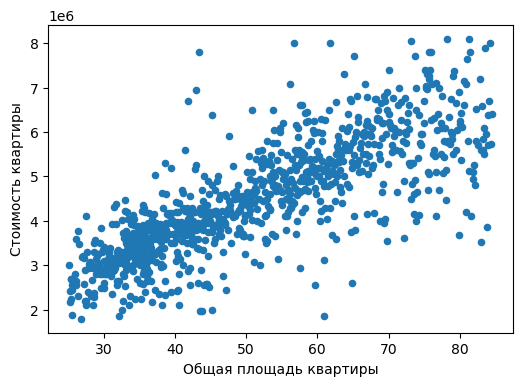

In [47]:
#зависимость цены от площади
data_total_area = data.pivot_table(index='total_area', values = 'last_price', aggfunc = 'median').reset_index()
data_total_area.plot(kind='scatter',x='total_area',y='last_price', figsize =[6,4])
plt.xlabel("Общая площадь квартиры")
plt.ylabel("Стоимость квартиры")
data_total_area.corr()

**Зависимости цены от площади:** Из диаграммы рассеяния, показывающей зависимость цены от общей площади помещения, видно, что с ростом площади помещения диапозон цен на квартиру с такой площадью растет, то есть для квартиры 70 кв.м. характерен бОльший разброс цен. Также заметена линия тредна роста цены при росте площади квартиры. Это также подверждает положительная корреляция равная 0,80. В основном выборка состоит из квартир до 60 кв м.

,living_area,last_price
living_area,1.000000,0.594673
last_price,0.594673,1.000000


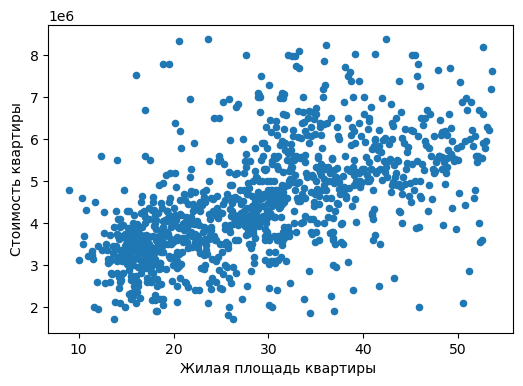

In [48]:
#зависимости цены от жилой прощади квартиры
data_living_area = data.pivot_table(index='living_area', values = 'last_price', aggfunc = 'median').reset_index()
data_living_area.plot(kind='scatter',x='living_area',y='last_price', figsize =[6,4])
plt.xlabel("Жилая площадь квартиры ")
plt.ylabel("Стоимость квартиры")
data_living_area.corr()


**Зависимости цены от жилой прощади квартиры:** Из диаграммы рассеяния,виден больший разброс значений, чем в прошлой диаграмме. Однако также заметен рост цены при росте жилой площади квартиры, но уже не такая высокая корреляция (0.59). Наибольшее число объявлений приходится на жилую площадь от 15 до 25 кв.м. 

,kitchen_area,last_price
kitchen_area,1.000000,0.487244
last_price,0.487244,1.000000


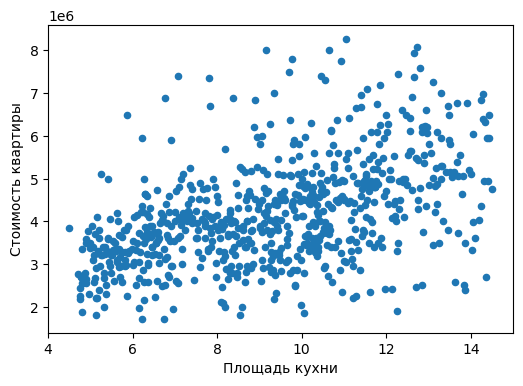

In [49]:
data_kitchen_area = data.pivot_table(index='kitchen_area', values = 'last_price', aggfunc = 'median').reset_index()
data_kitchen_area.plot(kind='scatter',x='kitchen_area',y='last_price',figsize =[6,4])
plt.xlabel("Площадь кухни")
plt.ylabel("Стоимость квартиры")
data_kitchen_area.corr()

**Зависимости цены от прощади кухни:** Из диаграммы рассеяния,виден еще больший разброс значений, чем в прошлой диаграмме. Однако также заметен тренд роста цены при росте жилой площади квартиры, но уже не такая высокая корреляция (0.48).

,rooms,last_price
rooms,1.000000,0.550748
last_price,0.550748,1.000000


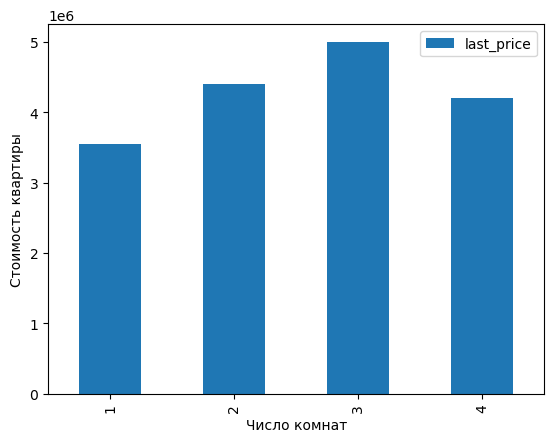

In [50]:
data_rooms = data.pivot_table(index='rooms', values = 'last_price', aggfunc = 'median').reset_index()
data_rooms.plot(kind='bar',x='rooms',y='last_price')
plt.xlabel("Число комнат")
plt.ylabel("Стоимость квартиры")
data_rooms.corr()

**Зависимости цены от кол-ва комнат:** Из столбчатой диаграммы, виден рост цены с увеличением кол-ва комнат. Исключением является столбец с 4-комнатными квартирами. Вероятнее всего таких объявлений просто немного. 

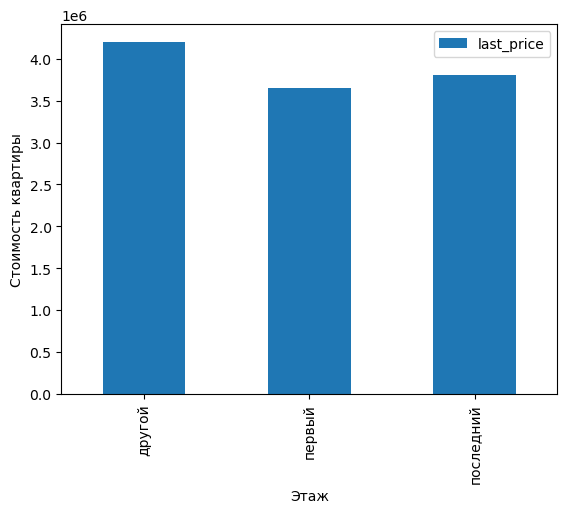

In [58]:
data_type_floor = data.pivot_table(index='type_floor', values = 'last_price', aggfunc = 'median').reset_index()
data_type_floor.plot(kind='bar',x='type_floor',y='last_price')
plt.xlabel("Этаж")
plt.ylabel("Стоимость квартиры");

**Зависимости цены от этажа:** Из столбчатой диаграммы, видно, что наибольшая цена характерна для категории "другой" этаж. Однако сильной линейной зависимости нет. 


,weekday_exposition,last_price
weekday_exposition,1.000000,0.261533
last_price,0.261533,1.000000


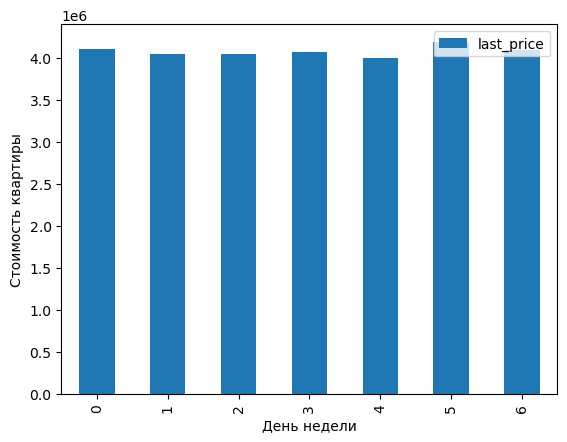

In [59]:
data_weekday_exposition = data.pivot_table(index='weekday_exposition', values = 'last_price', aggfunc = 'median').reset_index()
data_weekday_exposition.plot(kind='bar',x='weekday_exposition',y='last_price')
plt.xlabel("День недели")
plt.ylabel("Стоимость квартиры")
data_weekday_exposition.corr()

**Зависимости цены от того, в какой день недели было опубликовано объявление:** Из столбчатой диаграммы, видно, что линейной зависимости нет. Данный факт также подверждает значение коэффициента корреляции, равное 0,26


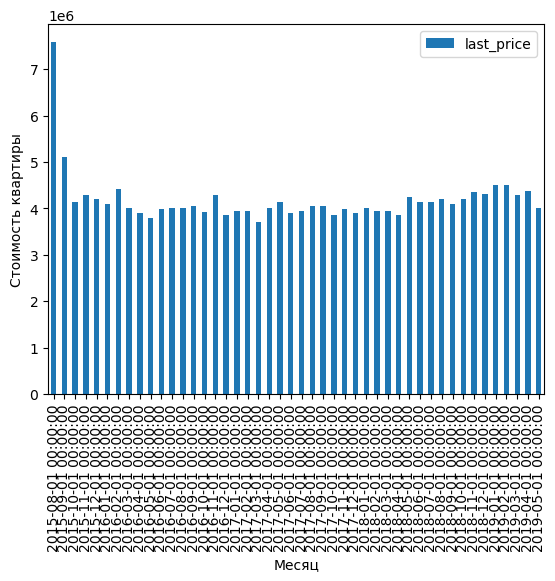

In [60]:
data_month_exposition = data.pivot_table(index='month_exposition', values = 'last_price', aggfunc = 'median').reset_index()
data_month_exposition.plot(kind='bar',x='month_exposition',y='last_price')
plt.xlabel("Месяц")
plt.ylabel("Стоимость квартиры");


**Зависимости цены от того, в какой месяц было опубликовано объявление:** Из столбчатой диаграммы, видно, что линейной зависимости нет. Данный факт также подверждает значение коэффициента корреляции, равное 0,11


,year_exposition,last_price
year_exposition,1.000000,0.257932
last_price,0.257932,1.000000


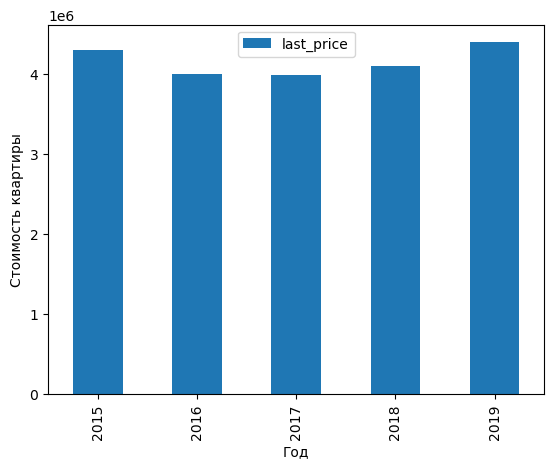

In [61]:
data_year_exposition = data.pivot_table(index='year_exposition', values = 'last_price', aggfunc = 'median').reset_index()
data_year_exposition.plot(kind='bar',x='year_exposition',y='last_price')
plt.xlabel("Год")
plt.ylabel("Стоимость квартиры")
data_year_exposition.corr()

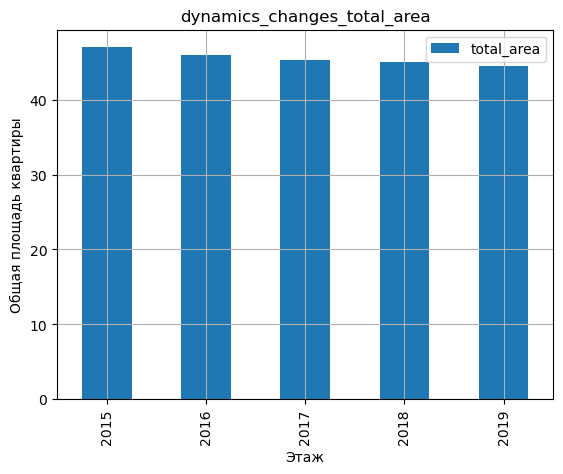

In [62]:
data_year_exposition = data.pivot_table(index='year_exposition', values = 'total_area', aggfunc = 'median').reset_index()
data_year_exposition.plot(kind='bar',x='year_exposition',y='total_area', title = 'dynamics_changes_total_area', grid =True)
plt.xlabel("Этаж")
plt.ylabel("Общая площадь квартиры");


**Зависимости цены от того, в какой месяц было опубликовано объявление:** Из столбчатой диаграммы, видно, что существует несильная линейная зависимость. Данный факт также подверждает значение коэффициента корреляции, равное 0,48. До 2017 года цены на квартиы падали, а с 2017 года цены начали расти. Связать это можно с определенными обстоятельствами существующими в экономики в секторе недвижимости.

Если рассматривать гипотизу, что цена падала/росла из года в год ввиду падения/роста площади, то из графика `dynamics_changes_total_area` видно, что площадь продаваемых квартир из года в год падала. А цена снижалась только до 2017 года, а затем росла. 



#### 4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [56]:
data_locality_name = data.pivot_table(index='locality_name', values='price_one_metre', aggfunc=['count','median'])
data_locality_name.columns = ['count_exposition', 'mean_price_merte']
data_locality_name_top = data_locality_name.sort_values(by='count_exposition', ascending = False)[:10]
data_locality_name_top.sort_values(by='mean_price_merte', ascending = False)


,count_exposition,mean_price_merte
locality_name,,
санкт-петербург,7240,99290.5
пушкин,184,96333.0
кудрово,271,95081.0
парголово,216,91378.0
мурино,392,83333.0
петергоф,129,80952.0
шушары,300,75757.0
колпино,231,73333.0
гатчина,187,66666.0


В таблице выше выделены 10 населеных пунктном с наибольшим числом объявлений и их средней ценой одного квадратного метра. На первом месте располагается Санкт-Петербург, ввиду того, что населеный город большой. Кроме того, стоит заметить, что там самая высокая стоимость квадратного метра. Также в тройку лидеров попали такие населенные пункты как: Пушкин и Кудрово.  Наименьшая стоимость квадратного метра приходится на населенный пункт под названием Всеволожск. Стоимость квадратного метра в данном населенном пункте в 1.5 раз меньше, чем в СПб. 

#### 4.5. Найдем среднюю цену каждого километра в городе Санкт-Петербург.  Рассмотрим как стоимость объектов зависит от расстояния до центра города.

,cityCenters_nearest_km,last_price,price_km
cityCenters_nearest_km,1.000000,-0.870768,-0.641406
last_price,-0.870768,1.000000,0.631197
price_km,-0.641406,0.631197,1.000000


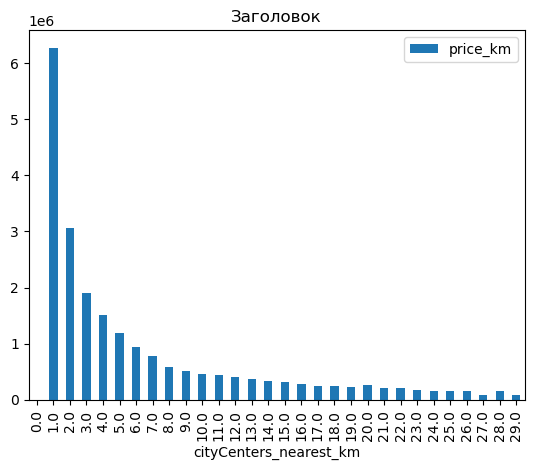

In [57]:
data_spb = data[data['locality_name'] == "санкт-петербург"]
data_spb_price_km = data_spb.pivot_table(index='cityCenters_nearest_km', values ='last_price', aggfunc='mean').reset_index(drop=False)
data_spb_price_km['last_price'] = data_spb_price_km['last_price'].astype('int')
data_spb_price_km['price_km'] = (data_spb_price_km['last_price']/data_spb_price_km['cityCenters_nearest_km'])
data_spb_price_km.plot(kind='bar', x='cityCenters_nearest_km', y= 'price_km', title = 'Заголовок')
data_spb_price_km.corr()

Как можно заметить из диаграммы, с ростом удаленности объекта от центра цена падает. Особенно сильный скачек заметен с 1 км до 2 км, цена изменилась в два раза. Квартиры в самом центре (в пределах 1 км) имеют наибольшую стоимость. 

### Общий вывод

В результате анализа данных можно сформулировать следующие выводы:
1) Данные имели пропуски, которые могли исказить результаты исследования, в ходе предобработки данных многие из них были устранены. Также в ходе предобработки данных были устранены неявные дубликаты, аномальные значения и выбросы. 

2) Основная доля объявлений приходится на площадь квартиры равно 30-48 кв.м. Особенно на площадь равную 45 кв.м. Наиболее частовстречающая цена 4 000 000 руб. Больше всего объявлений однокомнатных квартир, а также квартир расположенных  на других этажах (за исключением первого и последнего). В основном квартиры продавались в течение 45 и 60 дней.  

3) Наиболее сильно на цену влияет общая площадь объекта, в меньше степени жилая площадь и площадь кухни. Также наблюдается прямая зависимость между кол-во комнат и ценой. Небольшое влияние на цену оказывает этаж, на котором расположена квартира -  стоимость квартир, расположенных на других этажах, за исключением первого и последнего, самая высокая. День, месяц и год публикации объявления не оказывает сильного влияния на цену. 

4) Следующие населенные пункты имеют наибольшее число объявлений: Санкт-петербург, Пушкин, Кудрово, Парголово, Мурино, Петергоф, Шушары, Колпино, Гатчина, Всеволожск. Наибольшая стоимость квадратного метра в Санкт-Петербурге. В тройку лидеров также попали такие населенные пункты как: Пушкин и Кудрово.  Наименьшая стоимость квадратного метра в населеннем пункте под названием Всеволожск. Стоимость квадратного метра в данном населенном пункте в 1.5 раз меньше, чем в СПб. 

5) Зависимость между удаленность квартиры от центры и ценой в городе Санкт-Петербург обратная.  С ростом удаленности объекта от центра цена падает. Особенно сильный скачек заметен с 1 км до 2 км, цена меняется в два раза. Квартиры в самом центре (в пределах 1 км) имеют наибольшую стоимость. 